In [28]:
import pandas as pd
import numpy as np

# on choisit un modèle de régression linéaire
from sklearn.linear_model import LinearRegression

In [29]:
df = pd.read_csv("age_vs_poids_vs_taille_vs_sexe.csv")
df.head()

,sexe,age,taille,poids
0,1,147,151.13,45.80
1,0,160,150.62,35.60
2,1,148,149.86,43.08
3,0,149,144.78,41.72
4,0,156,156.21,49.21


In [30]:
df.shape

(237, 4)

In [31]:
df.describe()

,sexe,age,taille,poids
count,237.000000,237.000000,237.000000,237.000000
mean,0.468354,164.430380,155.865148,45.944430
std,0.500054,18.425767,10.021301,8.816557
min,0.000000,139.000000,128.270000,22.900000
25%,0.000000,148.000000,149.350000,38.550000
50%,0.000000,163.000000,156.210000,45.800000
75%,1.000000,178.000000,163.320000,50.790000
max,1.000000,250.000000,182.880000,77.780000


<font color="yellow">Entrainons une régression linéaire pour prédire le poids en fonction des variables : 

sexe, âge

</font>

poids ~ age + sexe
Définissons pour cela X, la matrice des variables d'entrées et y le vecteur de la variable cible

In [32]:
# les variables prédictives
X = df[['sexe', 'age']]

# la variable cible, le poids
y = df.poids

On choisit le modèle de regression linéaire de scikit-learn.

In [33]:
# Importer et instancier le modèle
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

Entraîner le modèle revient à appliquer la methode fit() au modèle

In [34]:
# on entraîne ce modèle sur les données avec la méthode fit
reg.fit(X, y)

LinearRegression()

In [35]:
# et on obtient directement un score.
print(f"R^2 : {np.round(reg.score(X, y), 3)}")

R^2 : 0.416


In [36]:
# ainsi que les coefficients a,b,c de la régression linéaire
print(f" poids = {np.round(reg.coef_[0],  2)} * sexe + {np.round(reg.coef_[1],  2)} * age  + du bruit")

 poids = -2.06 * sexe + 0.3 * age  + du bruit


<font color="yellow">2) Reprenons maintenant l'exercice en considerant cette fois toutes les variables prédictives disponibles : 

age, taille et sexe

</font>

La matrice de prédiction est:

In [37]:
# les variables prédictives
X = df[['sexe', 'age', 'taille']]

# la variable cible, le poids
y = df.poids

# entrainons un nouveau modele de regression lineaire
reg2 = LinearRegression()
reg2.fit(X,y)

# le score
print(f"R^2 : {np.round(reg2.score(X, y), 3)}")
# et les coefficients
print(f"poids = {np.round(reg2.coef_[0],  2)} * sexe + {np.round(reg2.coef_[1],  2)} * age +  {np.round(reg2.coef_[2],  2)} * taille + du bruit")

R^2 : 0.631
poids = 0.15 * sexe + 0.11 * age +  0.55 * taille + du bruit


Donc rajouter la variable taille aux variables sexe et age permet de passer de R^2 = 0.41 a R^2 = 0.63, une nette amélioration !

### <font color="lightgreen">Prédiction du poids pour des nouveaux échantillons</font>
Le modèle permet maintenant de prédire la valeur cible (poids) en fonction de nouvelles données d'entrée.

Par exemple, quel poids est prédit par la première regression poids ~ sexe + age pour un garçon agé de 150 mois ?

=> 42.5 kg

In [39]:
# prediction du poids pour un garçon agé de 150 mois
reg.predict(np.array([[0,150]]))

C:\Users\nbous\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([42.52765679])

In [40]:
# prediction du poids pour un garçon agé de 150 mois et de taille 170 cm
reg2.predict(np.array([[0, 150, 170]]))

C:\Users\nbous\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([52.14955185])

=> 52,2 Kg

### <font color="lightgreen">Performance du modèle</font>
Regardons maintenant les performances du modèle en utilisant d'autres scores

In [43]:
# les predictions sur tout les échantillons du dataset

y_pred = reg.predict(df[["sexe",'age']])
y_pred2 = reg2.predict(df[['sexe', 'age', 'taille']])

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
# MSE = mean_squared_error = fonction de minimisation de coût

# PERFORMANCE DU 1ER MODELE
print("1er Modele: poids ~ sexe + age")
print(f"\tmean_squared_error(y, y_pred): {mean_squared_error(y, y_pred)}")
print(f"\tmean_absolute_error(y, y_pred): {mean_absolute_error(y, y_pred)}")
print(f"\tmean_absolute_percentage_error(y, y_pred): {mean_absolute_percentage_error(y, y_pred)}")
print()


# PERFORMANCE DU 2EME MODELE
print("2eme Modele: poids ~ sexe + age + taille")
print(f"\tmean_squared_error(y, y_pred): {mean_squared_error(y, y_pred2)}")
print(f"\tmean_absolute_error(y, y_pred): {mean_absolute_error(y, y_pred2)}")
print(f"\tmean_absolute_percentage_error(y, y_pred): {mean_absolute_percentage_error(y, y_pred2)}")

1er Modele: poids ~ sexe + age
	mean_squared_error(y, y_pred): 45.17470814507523
	mean_absolute_error(y, y_pred): 5.219181502513357
	mean_absolute_percentage_error(y, y_pred): 0.11643376955710255

2eme Modele: poids ~ sexe + age + taille
	mean_squared_error(y, y_pred): 28.59911226330147
	mean_absolute_error(y, y_pred): 4.163592104513333
	mean_absolute_percentage_error(y, y_pred): 0.09053096861870079


=> On observe bien que le second modèle est bien meilleur que le premier, quel que soit la métrique de scoring utilisée.

********************** End *********************************************

### Nous allons essayer de prédire le volume de vente en fonction du budget publicitaire en TV, radio et journaux.

- La variable cible, "ventes", est continue, donc nous sommes bien dans une logique de régression (et non de classification).



In [50]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [51]:
advertising = pd.read_csv("advertising.csv")
advertising.head()

,tv,radio,journaux,ventes
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [52]:
advertising.shape

(200, 4)

In [53]:
advertising.describe()

,tv,radio,journaux,ventes
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [54]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tv        200 non-null    float64
 1   radio     200 non-null    float64
 2   journaux  200 non-null    float64
 3   ventes    200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


### Analyse bivariée

La fonction <strong>regplot()</strong> de seaborn permet non seulement d'afficher le nuage de points des variables tv, radio et journaux en fonction des ventes mais aussi de tracer la ligne de régression.

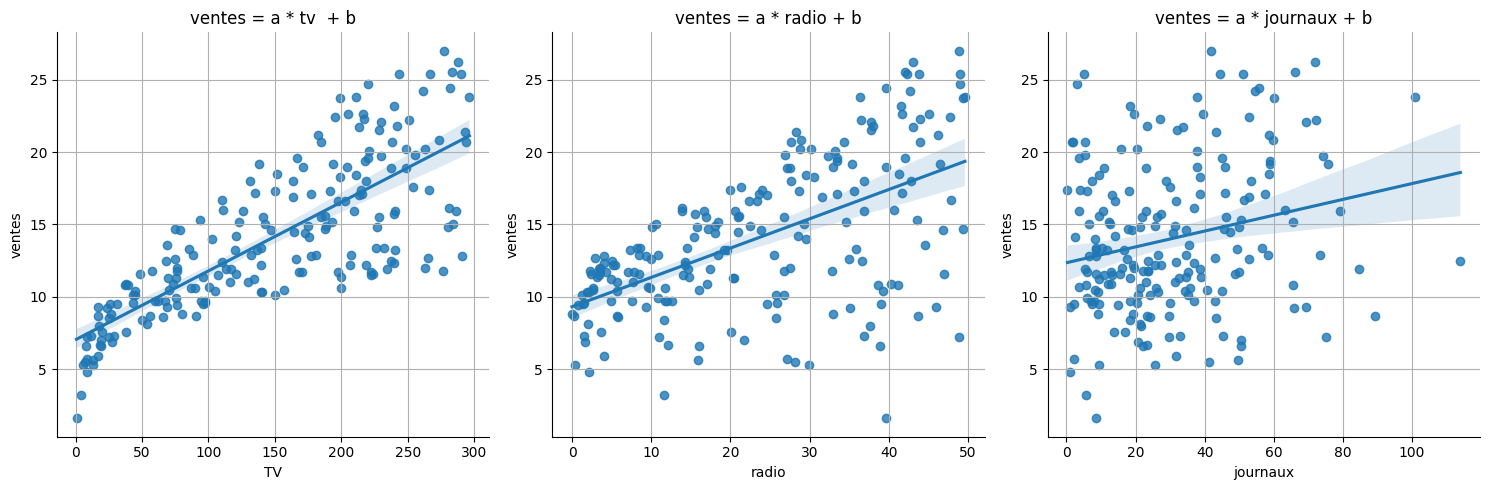

In [55]:
fig, ax = plt.subplots(1,3, figsize = (15,5))

plt.subplot(1,3,1)
sns.regplot(x = advertising[['tv']],y  =  advertising.ventes)
plt.ylabel('ventes')
plt.xlabel('TV')
plt.title('ventes = a * tv  + b')
plt.grid()
sns.despine()

plt.subplot(1,3,2)
sns.regplot(x = advertising[['radio']],y  =  advertising.ventes)
plt.ylabel('ventes')
plt.xlabel('radio')
plt.title('ventes = a * radio + b')
plt.grid()
sns.despine()

plt.subplot(1,3,3)
res = sns.regplot(x = advertising[['journaux']],y  =  advertising.ventes)
plt.ylabel('ventes')
plt.xlabel('journaux')
plt.title('ventes = a * journaux + b')
plt.grid()
sns.despine()

plt.tight_layout()
plt.show()

<font color="lightblue">La zone bleu pâle reflète l'incertitude du modèle. Plus elle est grande, moins la régression est fiable.</font>

Le graphe montre que :

- tv est plus prédictive des ventes que radio

- radio est plus prédictive que journaux

L'observation est confirmée par les coefficients de corrélation :

In [56]:
advertising.corr()

,tv,radio,journaux,ventes
tv,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
journaux,0.056648,0.354104,1.000000,0.228299
ventes,0.782224,0.576223,0.228299,1.000000


<font color="lightblue">1. Choisir le modèle de régression linéaire simple de scikit-learn sans normalisation des données</font>

In [57]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

<font color="deepskyblue">Cette fois-ci, on va scinder notre dataset en une partie d'entraînement et une partie d'évaluation en utilisant la fonction train_test_split de scikit-learn.</font>

Cette fonction prends les variables d'entrée, la variable cible, un ratio et retourne 4 objets :

- X_train  : prédicteurs pour l'entraînement ;

- X_test  : prédicteurs pour l'évaluation ;

- y_train  : variable cible pour l'entraînement ;

- y_test  : variable pour l'évaluation.

On va ensuite utiliser :

- X_train  et  y_train  pour entraîner le modèle (train en anglais) ;

- X_test  et  y_test  pour l'évaluer (test en anglais).

1/ Scinder le dataset

In [59]:
from sklearn.model_selection import train_test_split

# scinder le dataset entre variable cible et variables de prédictions
X = advertising[['tv','radio','journaux']]
y = advertising.ventes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

<font color="orange">

- Il est important de s'assurer que la relation entre la variable cible et les prédicteurs est linéaire avant d'utiliser la régression linéaire.

-  L'utilisation de  train_test_split  permet de diviser les données en sous-ensembles d'entraînement et de test pour évaluer le modèle.

- Le choix du paramètre  random_state  affecte la reproductibilité des résultats lors de la séparation des données en sous-ensembles.

</font>

Comme notre jeu de données a 200 échantillons et que l'on en réserve 20 % pour le test, on aura les tailles suivantes (  X.shape()  et  y.shape()  ) :

- X_train: 160 * 3

- X_test: 40 * 3

- y_train: 160 * 1

- y_test: 40 * 1

On a donc 160 échantillons pour entraîner notre modèle et 40 échantillons que le modèle ne voit pas pendant son entraînement et qui nous serviront à l'évaluer.

Le terme random_state est un paramètre qui permet de contrôler la reproductibilité des résultats lorsque vous effectuez des opérations qui impliquent de l'aléatoire, comme par exemple scinder les données en sous-ensembles de train et test.

En fixant une valeur spécifique pour random_state, vous vous assurez que les opérations aléatoires se déroulent toujours de la même manière. Les résultats sont reproductibles et vous pouvez comparer différents modèles.

In [60]:
# on entraine le modèle
reg.fit(X_train, y_train)

LinearRegression()

Pour estimer la performance sur le sous-ensemble de test, il faut tout d'abord obtenir les prédictions pour  X_test  :

In [61]:
# On note avec un  _pred  tout ce qui relève des prédictions du modèle.
y_pred_test = reg.predict(X_test)

On peut maintenant calculer l'écart entre les vraies valeurs de test  (y_test)  et celles prédites par le modèle.

Utilisons la RMSE et la MAPE comme scores. Pour ces 2 métriques, un score plus petit correspond à un meilleur modèle. MAPE est comprise entre 0 et 1, tandis que RMSE n'est pas contrainte.

In [62]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
print(f"RMSE: {mean_squared_error(y_test, y_pred_test)}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred_test)}")

RMSE: 3.174097353976104
MAPE: 0.15198846602831229


<font color="lightblue"> 2. Modèle de régression linéaire simple normalisée (sans quadratique) </font>

In [75]:
X = df[['tv','radio','journaux']]
y = df.ventes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

reg.fit(X_train, y_train)
y_hat_test = reg.predict(X_test)

print(f"Coefficients: {reg.coef_}")
print(f"RMSE: {mean_squared_error(y_test, y_hat_test)}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_hat_test)}")

Coefficients: [0.52072907 0.36945176 0.01235979]
RMSE: 0.004919860738384438
MAPE: 0.19102367858031732


(3ème modèle sur une régression polynomiale : il est meilleur car plus proche de 0

RMSE: 0.0036863988616064624

MAPE: 0.1620018279993567)

Est-ce un bon ou un mauvais score ?

Difficile à dire, comme la RMSE n'est pas absolue. Une MAPE de 0,15 semble bien, car plus proche de 0 que de 1.

Mais peut-on faire mieux ?

<font color="deepskyblue">Amélioration n° 1 : Ajouter un terme quadratique

Quadratique veut simplement dire "au carré".

3. Modèle de régression polynomiale

</font>

Si l'on regarde bien le nuage de points de  ventes  par rapport à  tv  , on remarque que ce nuage de points suit plutôt une courbe qu'une ligne droite. C'est particulièrement vrai pour la partie en bas à gauche du graphe.

On peut en déduire que la relation entre  ventes  et  tv  n'est pas simplement linéaire, c'est-à-dire :

ventes=a∗tv+b

Mais cela dépend aussi d'un terme tv2
 comme ceci :

 ventes=a∗tv+b∗tv2+c

C'est un polynôme du second degré de variable  tv  .

Lorsqu'on ajoute une puissance de l'une des variables dans la régression, on fait ce qu'on appelle une régression polynomiale.

La régression polynomiale consiste à ajouter les puissances de certains prédicteurs dans la régression. C'est une façon simple pour capturer les relations non linéaires entre les variables.

Avant d'entraîner ce nouveau modèle, on remarque que l'amplitude de  tv2  va être bien plus grande que celle des autres variables. On va donc normaliser les variables, pour que leurs amplitudes soient compatibles.

scikit-learn offre différentes méthodes pour normaliser ou standardiser des variables.

In [63]:
# Créons la nouvelle variable tv2 = tv^2 :
advertising['tv2'] = advertising.tv**2

Normalisons l'amplitude en utilisant MinMaxScaler qui force les variables entre 0 et 1.

1. L'importer :

In [65]:
from sklearn.preprocessing import MinMaxScaler

2. Le créer OU l'instancier :

In [66]:
scaler = MinMaxScaler()

3. Scaler et transformer avec ".fit_transform()"

In [67]:
data_array = scaler.fit_transform(advertising)

La méthode  transform  retourne un  array  et non une dataframe. Pour une question de simplification des scripts, je vais recréer la dataframe  df  :

In [68]:
df = pd.DataFrame(data_array, columns = ['tv','radio','journaux','ventes','tv2'])

In [69]:
df

,tv,radio,journaux,ventes,tv2
0,0.775786,0.762097,0.605981,0.807087,0.602664
1,0.148123,0.792339,0.394019,0.346457,0.022535
2,0.055800,0.925403,0.606860,0.303150,0.003362
3,0.509976,0.832661,0.511873,0.665354,0.261253
4,0.609063,0.217742,0.510994,0.444882,0.372080
...,...,...,...,...,...
195,0.126818,0.074597,0.118734,0.236220,0.016605
196,0.316199,0.098790,0.068602,0.318898,0.101001
197,0.596212,0.187500,0.053650,0.440945,0.356604
198,0.956713,0.846774,0.579595,0.940945,0.915495


on vérifie la normalisation

In [70]:
df.describe().loc[['min','max']]

,tv,radio,journaux,ventes,tv2
min,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0


<font color='deepskyblue'>Notre régression linéaire est maintenant une régression polynomiale grâce à la présence du terme quadratique  tv2.

Entraînons-la.

y ~ tv + radio + journaux + tv2

</font>

In [74]:
X = df[['tv','radio','journaux', 'tv2']]
y = df.ventes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

reg.fit(X_train, y_train)
y_hat_test = reg.predict(X_test)



print(f"Coefficients: {reg.coef_}")
print(f"RMSE: {mean_squared_error(y_test, y_hat_test)}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_hat_test)}")

Coefficients: [ 0.88007136  0.37464292  0.02197664 -0.36578279]
RMSE: 0.0036863988616064624
MAPE: 0.1620018279993567


=> On note une nette amélioration par rapport au premier modèle.

Il est possible d'aller encore plus loin en ajoutant le terme croisé  tv * radio  qui reflète l'effet cumulé d'une campagne de pub qui soit à la fois à la radio et à la télévision.